# Clustering and dimensionality reduction
Based on  Breast Cancer Wisconsin (Diagnostic) dataset located at ../data/breast+cancer+wisconsin+diagnostic
Load the data and split into train and test sets 80% for training and 20% for testing.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import minmax_scale

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
file_path = '../data/breast+cancer+wisconsin+diagnostic/wdbc.data'
column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(file_path, header=None, names=column_names)
print("Basic Statistics:")
print(data.describe())
malignant = data[data['Diagnosis'] == 'M']
benign = data[data['Diagnosis'] == 'B']
print("\n First 5 malignant of the data:")
print(malignant.head())
print("\n First 5 benign of the data:")
print(benign.head())

Basic Statistics:
                 ID   Feature_1   Feature_2   Feature_3    Feature_4  \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

        Feature_5   Feature_6   Feature_7   Feature_8   Feature_9  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.00

In [3]:
X = data.iloc[:, 2:]  # All features
Y = data['Diagnosis']  # Target variable (Diagnosis)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Checking the shape of the created datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
Y_train shape: (455,)
Y_test shape: (114,)


### Task 4: PCA
Use PCA to reduce the data (without the class labels) from 30 di-mensions to 2 dimensions and produce a scatter plot of this 2-dimensional data using colours to indicate the class label of each data point.

In [54]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)
# vaiance in first component
print("Variance: ", pca.explained_variance_)
# variance ratio
print("Variance: ", pca.explained_variance_ratio_)


X_train_pca shape: (455, 2)
X_test_pca shape: (114, 2)
Variance:  [444052.67048931   7298.09325567]
Variance:  [0.98183264 0.01613661]


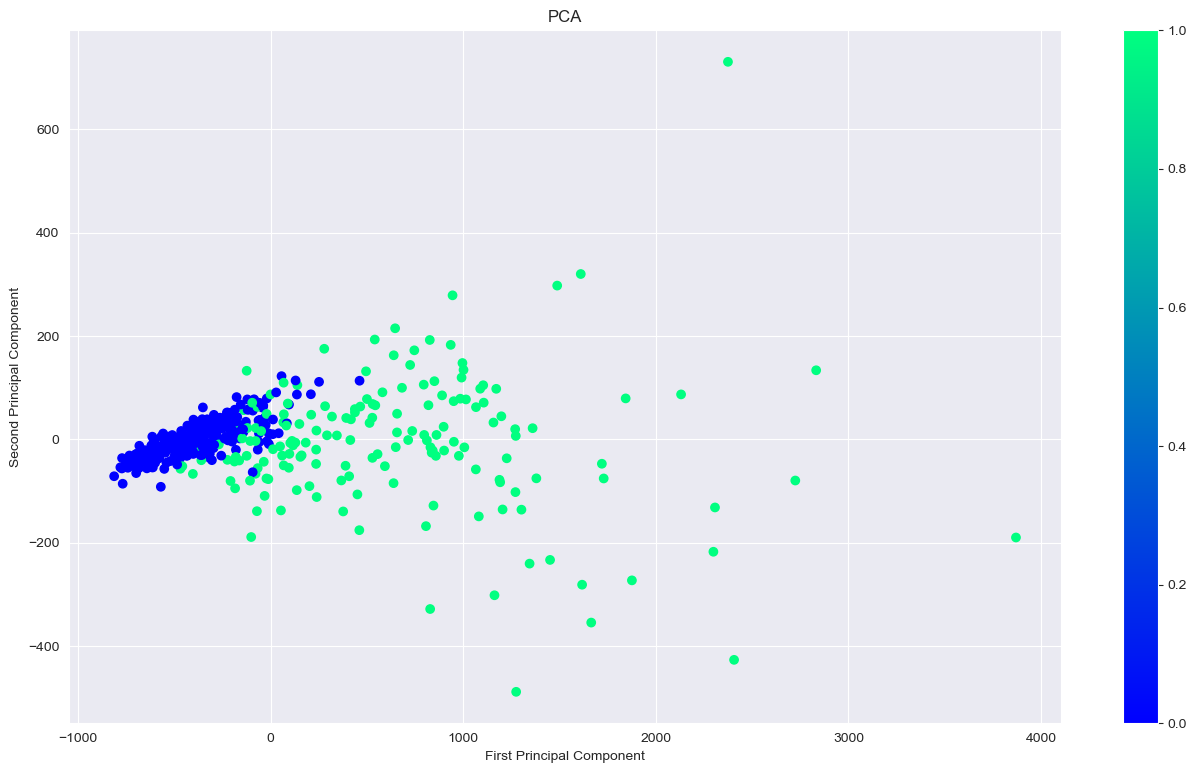

In [61]:
## plot the data
plt.figure(figsize=(16, 9))
numeric = {'M': 1, 'B': 0}
Y_train_numeric= Y_train.map(numeric)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train_numeric, cmap='winter')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.title('PCA')
plt.show()

### Task 5: Gaussian Mixture Model
Fit a Gaussian Mixture Model with 2 components using the 2-dimensional data and display the soft clusters using a scatter plot.The colour of each point in the scatter plot should represent the responsibilities associated with that point—so there will be more than 2 colours in scatter plot.  

E:\envis\Anaconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


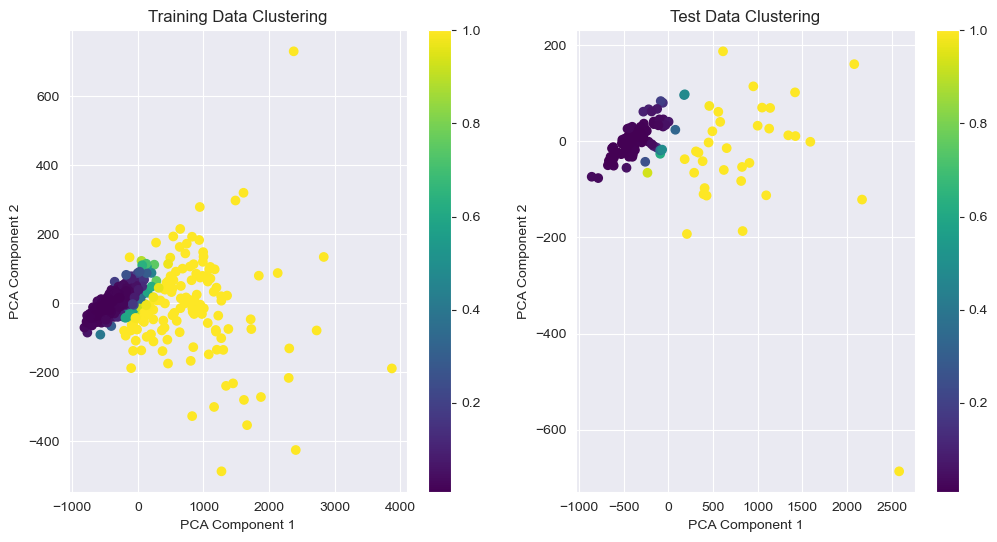

In [102]:
# Normalize the PCA components
X_train_pca_norm = minmax_scale(X_train_pca)

# Initialize GMM
gmm = GaussianMixture(n_components=2)

# Fit GMM
gmm.fit(X_train_pca)

train_probabilities = gmm.predict_proba(X_train_pca)
test_probabilities = gmm.predict_proba(X_test_pca)

train_prob_first_cluster = train_probabilities[:, 0]
test_prob_first_cluster = test_probabilities[:, 0]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_prob_first_cluster, cmap='viridis', label='Train Data')
plt.colorbar()
plt.title('Training Data Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_prob_first_cluster, cmap='viridis', label='Test Data')
plt.colorbar()
plt.title('Test Data Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()


### Task 6: Identify the main differences between them and explain these differences. See report

### Task 7: Classification with SVMs
Use an SVM approach to learn a classifier from the first 450 datapoints of the Breast Cancer Wisconsin (Diagnostic) dataset and report its accuracy on the last 118 datapoints.

Attempt to maximise the test set accuracy by choosing an appropriate kernel and appropriate degree of regularisation. 

In [14]:
# learn a classifier from the first 450 datapoints
# normalize the X_train, X_test, Y_train, Y_test
X_norm = minmax_scale(X)

X_train_svm = X_norm[:450]
X_test_svm = X_norm[450:]
numeric = {'M': 1, 'B': 0}
Y_train_svm = Y[:450].map(numeric)
Y_test_svm = Y[450:].map(numeric)

# Checking the shape of the created datasets
print("X_svm shape:", X_train_svm.shape)
print("Y_svm shape:", Y_train_svm.shape)
print("X_test_svm shape:", X_test_svm.shape)
print("Y_test_svm shape:", Y_test_svm.shape)
# print the first data
print("X_train_svm:", X_train_svm[:1])
print("Y_train_svm:", Y_train_svm[:1])
print("X_test_svm:", X_test_svm[:1])
print("Y_test_svm:", Y_test_svm[:1])
# check the data type
print("X_train_svm type:", type(X_train_svm))
print("Y_train_svm type:", type(Y_train_svm))
# check the max and min
print("X_train_svm max:", np.max(X_train_svm))
print("X_train_svm min:", np.min(X_train_svm))

X_svm shape: (450, 30)
Y_svm shape: (450,)
X_test_svm shape: (119, 30)
Y_test_svm shape: (119,)
X_train_svm: [[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
  0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
  0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]]
Y_train_svm: 0    1
Name: Diagnosis, dtype: int64
X_test_svm: [[0.23138814 0.40006764 0.22831871 0.1223754  0.12187415 0.26691614
  0.20564667 0.11858847 0.1459596  0.34035383 0.05232663 0.26383487
  0.05644819 0.02509909 0.17476289 0.43844444 0.16825758 0.2941845
  0.2203242  0.27742769 0.17289221 0.43070362 0.16484885 0.07913881
  0.15452684 0.30329579 0.25702875 0.30068729 0.14587029 0.29174866]]
Y_test_svm: 450    0
Name: Diagnosis, dtype: int64
X_train_svm type: <class 'numpy.ndarray'>
Y_train_svm type: <class 'pandas.core.series.Series'>


#### 7.1: Test set accuracy with different kernels
Set the C value to 3, change the kernel to rbf, linear, sigmoid, poly.

In [67]:
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(X_train_svm, Y_train_svm)
print("Accuracy on training set:", svm_rbf.score(X_train_svm, Y_train_svm))
print("Accuracy on test set:", svm_rbf.score(X_test_svm, Y_test_svm))

Accuracy on training set: 0.98
Accuracy on test set: 0.9915966386554622


In [68]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_svm, Y_train_svm)
print("Accuracy on training set:", svm_linear.score(X_train_svm, Y_train_svm))
print("Accuracy on test set:", svm_linear.score(X_test_svm, Y_test_svm))

Accuracy on training set: 0.9755555555555555
Accuracy on test set: 0.9831932773109243


In [69]:
svm_sig = SVC(kernel='sigmoid', C=1.0)
svm_sig.fit(X_train_svm, Y_train_svm)
print("Accuracy on training set:", svm_sig.score(X_train_svm, Y_train_svm))
print("Accuracy on test set:", svm_sig.score(X_test_svm, Y_test_svm))

Accuracy on training set: 0.22444444444444445
Accuracy on test set: 0.3949579831932773


In [70]:
svm_ploy = SVC(kernel='poly', C=1.0)
svm_ploy.fit(X_train_svm, Y_train_svm)
print("Accuracy on training set:", svm_ploy.score(X_train_svm, Y_train_svm))
print("Accuracy on test set:", svm_ploy.score(X_test_svm, Y_test_svm))

Accuracy on training set: 0.9866666666666667
Accuracy on test set: 0.9915966386554622


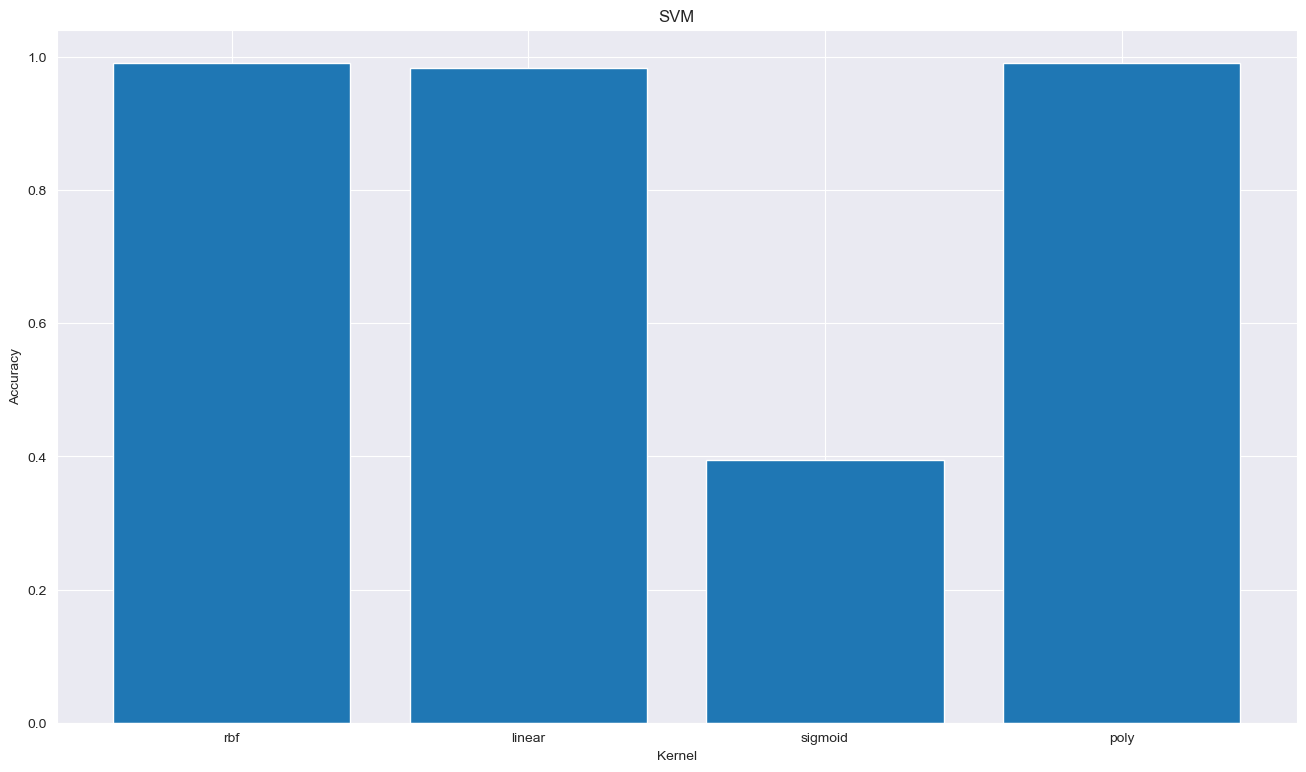

In [71]:
# plot the 4 different kernels with the best parameters and the accuracy
plt.figure(figsize=(16, 9))
plt.bar(['rbf', 'linear', 'sigmoid', 'poly'], [svm_rbf.score(X_test_svm, Y_test_svm), svm_linear.score(X_test_svm, Y_test_svm), svm_sig.score(X_test_svm, Y_test_svm), svm_ploy.score(X_test_svm, Y_test_svm)])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.show()

In [72]:
param = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly']}
svm_default = SVC()
grid_search = GridSearchCV(svm_default, param, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_svm, Y_train_svm)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters: {'kernel': 'linear'}
Best score:  0.9733333333333333


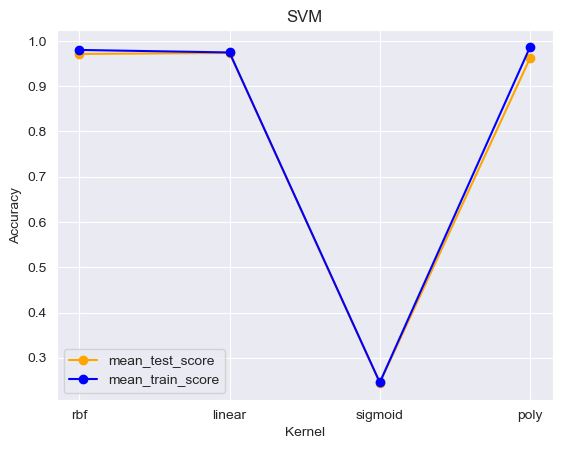

In [73]:
plt.figure()
plt.plot(param['kernel'], grid_search.cv_results_['mean_test_score'],'o-', color='orange', label='mean_test_score')
plt.plot(param['kernel'], grid_search.cv_results_['mean_train_score'],'o-', color='blue', label='mean_train_score')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.legend()
plt.show()

In [74]:
svm_rbf = SVC(kernel='rbf', C=1)
svm_linear = SVC(kernel='linear', C=1)

scores_rbf = cross_val_score(svm_rbf, X_train_svm, Y_train_svm, cv=5, scoring='accuracy')
scores_linear = cross_val_score(svm_linear, X_train_svm, Y_train_svm, cv=5, scoring='accuracy')

print("RBF kernel accuracy on each fold:", scores_rbf)
print("RBF kernel mean cross-validation accuracy:", scores_rbf.mean())
print("Linear kernel accuracy on each fold:", scores_linear)
print("Linear kernel mean cross-validation accuracy:", scores_linear.mean())

RBF kernel accuracy on each fold: [0.96666667 0.96666667 0.96666667 0.95555556 0.98888889]
RBF kernel mean cross-validation accuracy: 0.968888888888889
Linear kernel accuracy on each fold: [0.97777778 0.98888889 0.95555556 0.96666667 0.98888889]
Linear kernel mean cross-validation accuracy: 0.9755555555555556


#### 7.2: Test set accuracy with different C
Set the kernel to linear, change the C value to 0.1, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1, 2.

In [75]:
param = {'C': [0.1, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1, 2]}
# default kernel is linear
svm_default = SVC(kernel='linear')

grid_search = GridSearchCV(svm_default, param, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_svm, Y_train_svm)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters: {'C': 0.7}
Best score:  0.98


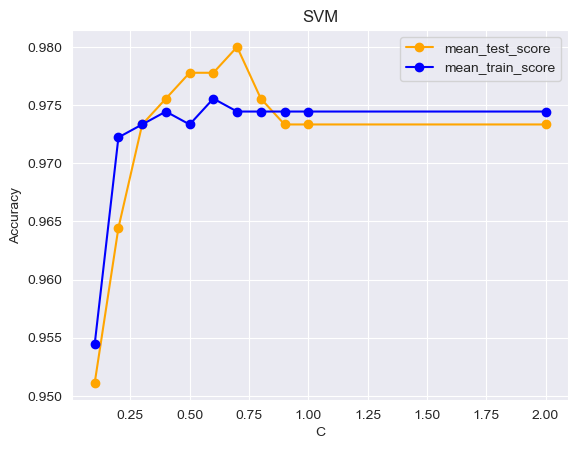

In [76]:
plt.figure()
plt.plot(param['C'], grid_search.cv_results_['mean_test_score'],'o-', color='orange', label='mean_test_score')
plt.plot(param['C'], grid_search.cv_results_['mean_train_score'],'o-', color='blue', label='mean_train_score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.legend()
plt.show()

#### 7.3: Test set accuracy with different kernel and C
Using grid search to find the best parameters combination

In [77]:
param = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly'], 'C': [0.1, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1, 2,]}
svm_default = SVC()
grid_search = GridSearchCV(svm_default, param, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_svm, Y_train_svm)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters: {'C': 0.7, 'kernel': 'linear'}
Best score:  0.98


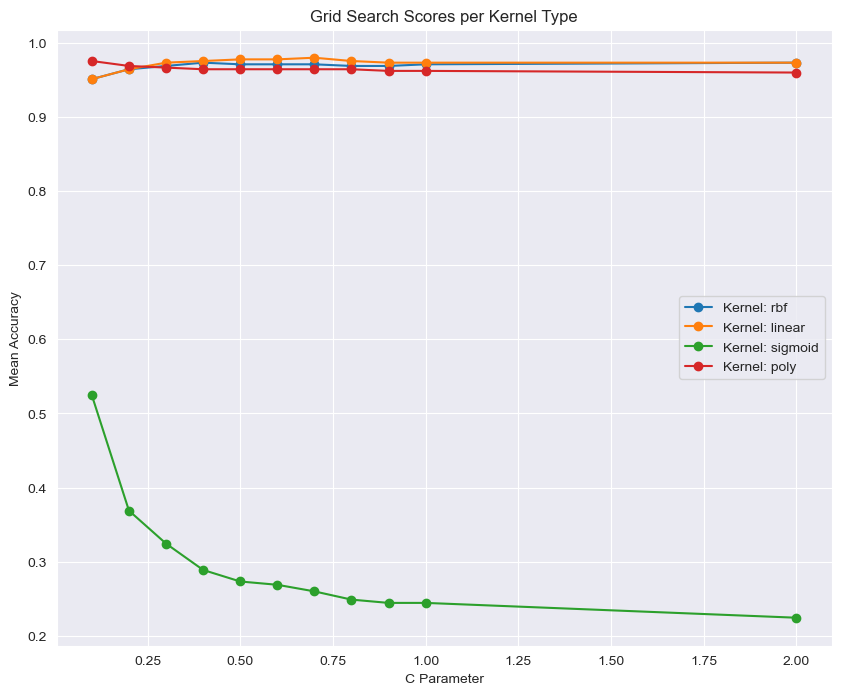

In [78]:
means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']


plt.figure(figsize=(10, 8))

for kernel in param['kernel']:
   
    kernel_means = [means[i] for i in range(len(params)) if params[i]['kernel'] == kernel]
    plt.plot(param['C'], kernel_means, '-o', label=f'Kernel: {kernel}')

plt.title('Grid Search Scores per Kernel Type')
plt.xlabel('C Parameter')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)
plt.show()

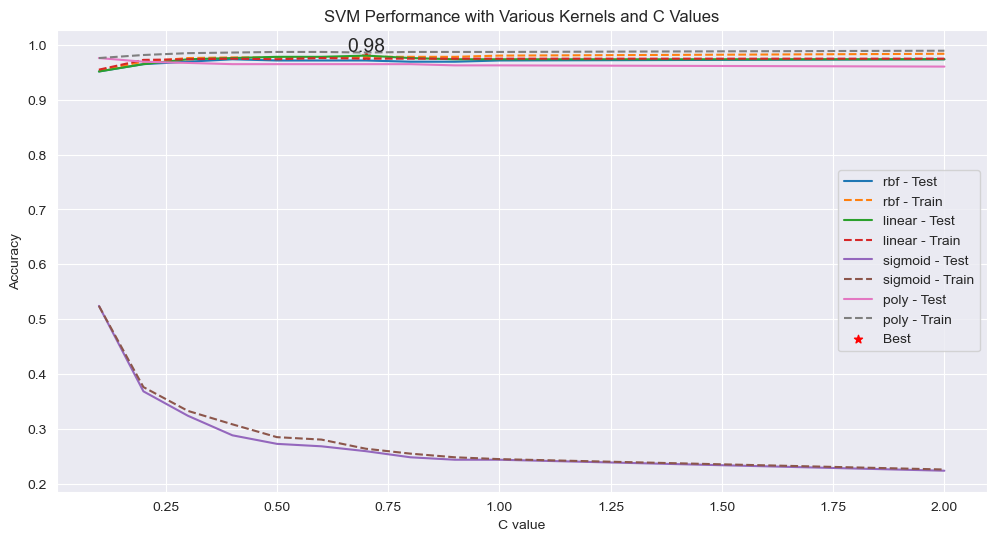

In [79]:
# plot the 4 different kernels with the best parameters and the accuracy
results = pd.DataFrame(grid_search.cv_results_)

results['param_C'] = results['param_C'].astype(float)
results['mean_test_score'] = results['mean_test_score']
results['mean_train_score'] = results['mean_train_score']
results['param_kernel'] = results['param_kernel']

plt.figure(figsize=(12, 6))

for kernel in param['kernel']:
    subset = results[results['param_kernel'] == kernel]
    plt.plot(subset['param_C'], subset['mean_test_score'], label=f'{kernel} - Test')
    plt.plot(subset['param_C'], subset['mean_train_score'], label=f'{kernel} - Train', linestyle='--')

plt.scatter(grid_search.best_params_['C'], grid_search.best_score_, marker='*', color='r', label='Best')
plt.text(grid_search.best_params_['C'], grid_search.best_score_, f"{grid_search.best_score_:.2f}", horizontalalignment='center', verticalalignment='bottom', fontsize=14)

plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('SVM Performance with Various Kernels and C Values')
plt.legend()
plt.show()


#### Task 8: Classification with SVMs via PCA
Use PCA to reduce the data (without the class labels) from 30 dimensions to 2 dimensions and use an SVM approach to learn a classifier from the training data and report its accuracy on the test data.

In [80]:
# use pca to reduce the data from 30 dimensions to 2 dimensions
pca = PCA(n_components=2)
reduced_train = pca.fit_transform(X_train_svm)
reduced_test = pca.transform(X_test_svm)
print("reduced_train shape:", reduced_train.shape)
print("reduced_test shape:", reduced_test.shape)


reduced_train shape: (450, 2)
reduced_test shape: (119, 2)


#### 8.1: Test set accuracy with different kernels
Set the C value to 1, change the kernel to rbf, linear, sigmoid, poly.

In [81]:
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(reduced_train, Y_train_svm)
print("Accuracy on training set:", svm_rbf.score(reduced_train, Y_train_svm))
print("Accuracy on test set:", svm_rbf.score(reduced_test, Y_test_svm))

Accuracy on training set: 0.9466666666666667
Accuracy on test set: 0.957983193277311


In [82]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(reduced_train, Y_train_svm)
print("Accuracy on training set:", svm_linear.score(reduced_train, Y_train_svm))
print("Accuracy on test set:", svm_linear.score(reduced_test, Y_test_svm))

Accuracy on training set: 0.9488888888888889
Accuracy on test set: 0.9663865546218487


In [83]:
svm_sig = SVC(kernel='sigmoid', C=1.0)
svm_sig.fit(reduced_train, Y_train_svm)
print("Accuracy on training set:", svm_sig.score(reduced_train, Y_train_svm))
print("Accuracy on test set:", svm_sig.score(reduced_test, Y_test_svm))

Accuracy on training set: 0.9133333333333333
Accuracy on test set: 0.8991596638655462


In [84]:
svm_ploy = SVC(kernel='poly', C=1.0)
svm_ploy.fit(reduced_train, Y_train_svm)
print("Accuracy on training set:", svm_ploy.score(reduced_train, Y_train_svm))
print("Accuracy on test set:", svm_ploy.score(reduced_test, Y_test_svm))

Accuracy on training set: 0.9111111111111111
Accuracy on test set: 0.9663865546218487


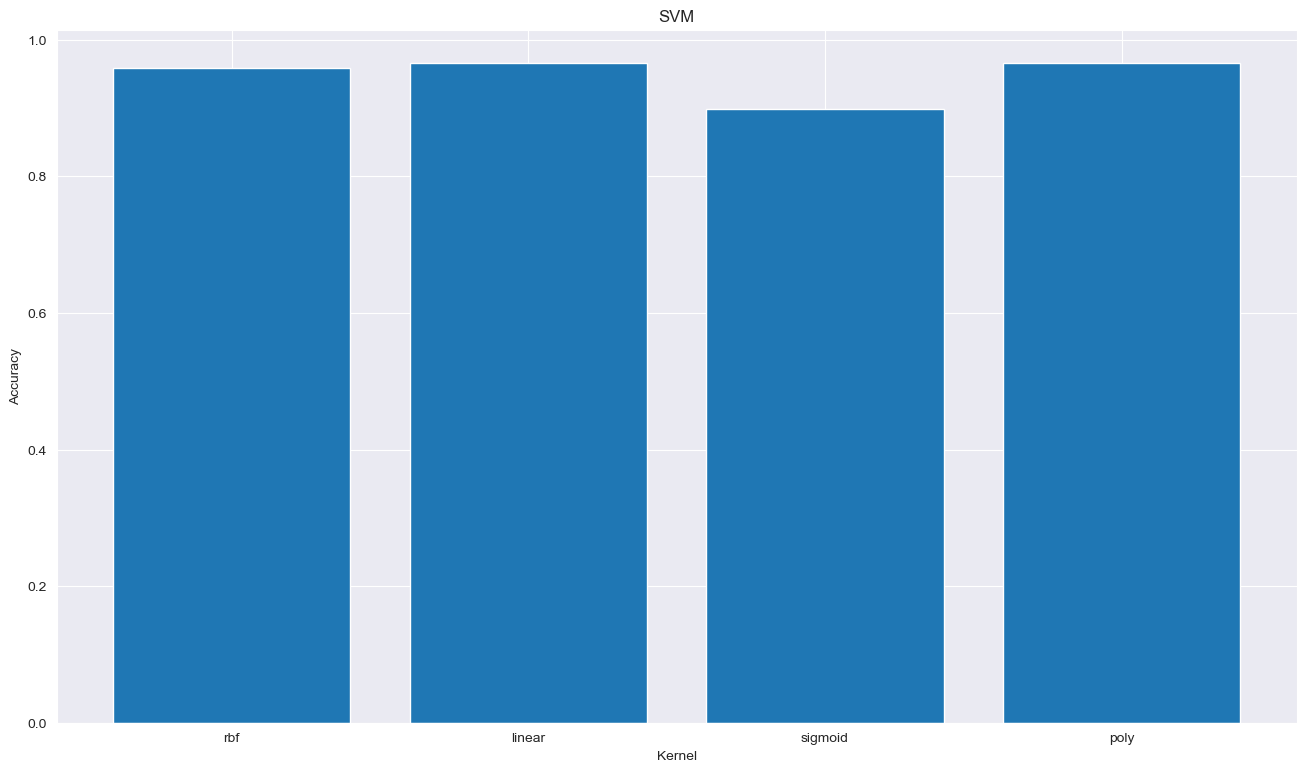

In [85]:
# plot the 4 different kernels with the best parameters and the accuracy
plt.figure(figsize=(16, 9))
plt.bar(['rbf', 'linear', 'sigmoid', 'poly'], [svm_rbf.score(reduced_test, Y_test_svm), svm_linear.score(reduced_test, Y_test_svm), svm_sig.score(reduced_test, Y_test_svm), svm_ploy.score(reduced_test, Y_test_svm)])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.show()

In [86]:
param = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly']}
svm = SVC()
grid_search = GridSearchCV(svm, param, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(reduced_train, Y_train_svm)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters: {'kernel': 'linear'}
Best score:  0.9444444444444445


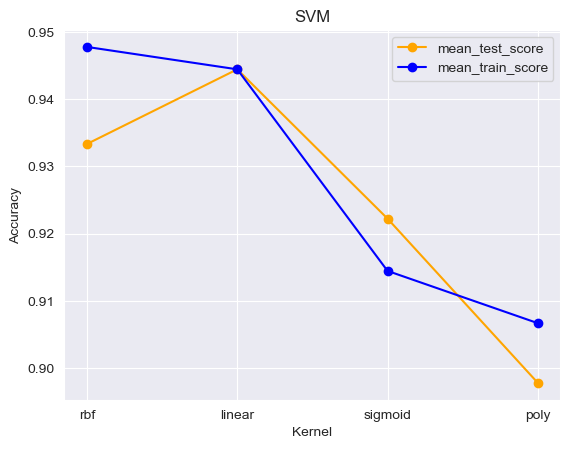

In [87]:
plt.figure()
plt.plot(param['kernel'], grid_search.cv_results_['mean_test_score'],'o-', color='orange', label='mean_test_score')
plt.plot(param['kernel'], grid_search.cv_results_['mean_train_score'],'o-', color='blue', label='mean_train_score')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.legend()
plt.show()

#### 8.2: Test set accuracy with different C
Set the kernel to linear, change the C value to 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.

In [98]:
param = {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# default kernel is linear
svm_default = SVC(kernel='linear')
grid_search = GridSearchCV(svm_default, param, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(reduced_train, Y_train_svm)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters: {'C': 4}
Best score:  0.9533333333333335


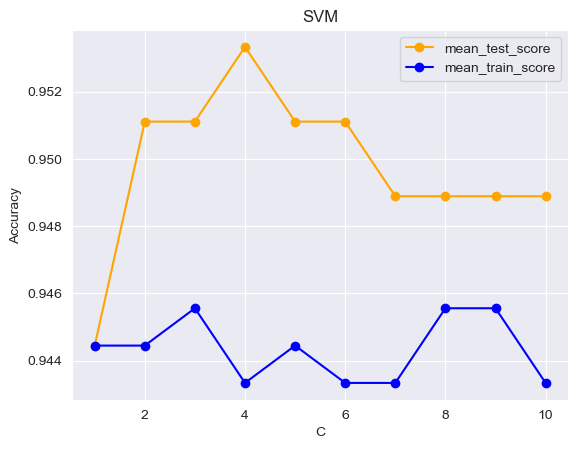

In [99]:
plt.figure()
plt.plot(param['C'], grid_search.cv_results_['mean_test_score'],'o-', color='orange', label='mean_test_score')
plt.plot(param['C'], grid_search.cv_results_['mean_train_score'],'o-', color='blue', label='mean_train_score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.legend()
plt.show()


#### 8.3: Test set accuracy with different kernel and C
Using grid search to find the best parameters combination

In [100]:
param = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly'], 'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
svm_default = SVC()
grid_search = GridSearchCV(svm_default, param, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(reduced_train, Y_train_svm)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters: {'C': 4, 'kernel': 'linear'}
Best score:  0.9533333333333335


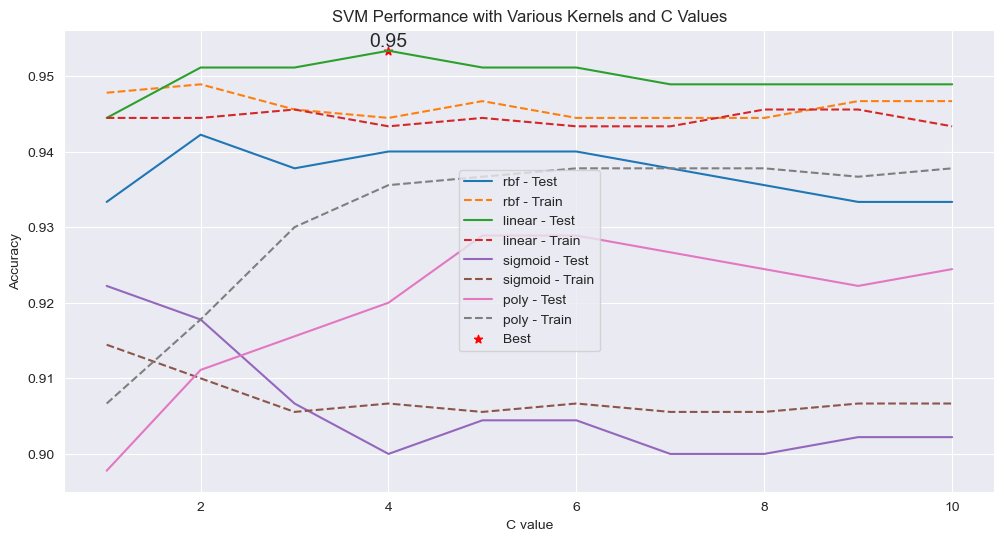

In [101]:
results = pd.DataFrame(grid_search.cv_results_)

results['param_C'] = results['param_C'].astype(float)
results['mean_test_score'] = results['mean_test_score']
results['mean_train_score'] = results['mean_train_score']
results['param_kernel'] = results['param_kernel']

plt.figure(figsize=(12, 6))

for kernel in param['kernel']:
    subset = results[results['param_kernel'] == kernel]
    plt.plot(subset['param_C'], subset['mean_test_score'], label=f'{kernel} - Test')
    plt.plot(subset['param_C'], subset['mean_train_score'], label=f'{kernel} - Train', linestyle='--')

plt.scatter(grid_search.best_params_['C'], grid_search.best_score_, marker='*', color='r', label='Best')
plt.text(grid_search.best_params_['C'], grid_search.best_score_, f"{grid_search.best_score_:.2f}", horizontalalignment='center', verticalalignment='bottom', fontsize=14)

plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('SVM Performance with Various Kernels and C Values')
plt.legend()
plt.show()

#### Task 9: Confusion Matrix for SVM (30d) and SVM (2d)
Compare the confusion matrices for the SVM classifier trained on the 30-dimensional data and the SVM classifier trained on the 2-dimensional data.
Using the 2-dimensional approximation to the original data affected test set accuracy

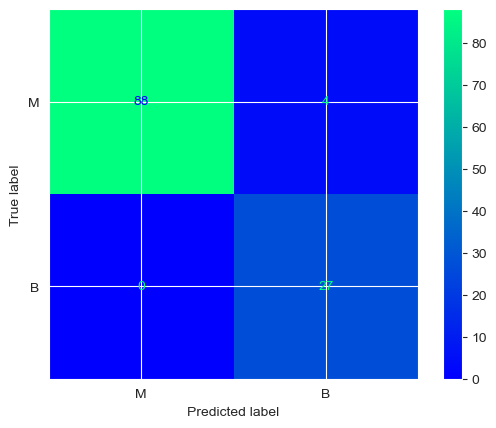

In [108]:
cm = confusion_matrix(Y_test_svm, svm_linear.predict(reduced_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['M', 'B'])
disp.plot(cmap='winter')